## Aula 4 - Portfólio

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'arquivos/papeis.xlsx')

papeis = df['papeis'].tolist()
papeis = [papel+'.SA' for papel in papeis] + ['SPY', 'GLD', 'BOVA11.SA', 'SEQL3.SA']

data = yf.download(tickers=papeis, start='2010-01-01', end='2021-05-31')

[*********************100%***********************]  88 of 88 completed


In [3]:
data['Adj Close'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2942 entries, 2010-01-04 to 2021-05-28
Data columns (total 88 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   2824 non-null   float64
 1   ASAI3.SA   63 non-null     float64
 2   AZUL4.SA   1024 non-null   float64
 3   B3SA3.SA   2822 non-null   float64
 4   BBAS3.SA   2824 non-null   float64
 5   BBDC3.SA   2824 non-null   float64
 6   BBDC4.SA   2824 non-null   float64
 7   BBSE3.SA   2004 non-null   float64
 8   BEEF3.SA   2824 non-null   float64
 9   BIDI11.SA  459 non-null    float64
 10  BOVA11.SA  2824 non-null   float64
 11  BPAC11.SA  1054 non-null   float64
 12  BRAP4.SA   2824 non-null   float64
 13  BRDT3.SA   790 non-null    float64
 14  BRFS3.SA   2824 non-null   float64
 15  BRKM5.SA   2824 non-null   float64
 16  BRML3.SA   2824 non-null   float64
 17  BTOW3.SA   2824 non-null   float64
 18  CCRO3.SA   2824 non-null   float64
 19  CIEL3.SA   2824 non-null   flo

In [4]:
fechamento = data['Adj Close'].copy()

fechamento_limpo = fechamento.isnull().sum()

fechamento_limpo = [index for index, value in fechamento_limpo.items() if value <= 118]
fechamento = fechamento[fechamento_limpo]

fechamento.dropna(how='all',inplace=True)
fechamento.fillna(method='ffill', inplace=True)
fechamento

,ABEV3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BEEF3.SA,BOVA11.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,...,TAEE11.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,4.187932,14.458920,6.566867,10.765183,4.866180,69.370003,23.492781,20.497267,9.126999,5.925205,...,4.293434,5.570551,6.437285,5.210743,23.545773,32.089706,14.515941,3.633857,2.144630,5.748121
2010-01-05,4.212566,14.313846,6.476422,10.711831,5.058487,69.900002,23.966238,20.712132,9.043734,6.034931,...,4.294581,5.973989,6.329549,5.210743,23.615026,32.388855,14.462154,3.542718,2.139949,5.816976
2010-01-06,4.255542,14.333183,6.438272,10.626135,5.309321,70.300003,24.301846,20.994143,9.261502,6.309246,...,4.294581,5.896405,6.367256,5.210743,23.591938,33.074394,14.216256,3.507665,2.151650,5.911947
2010-01-07,4.275523,14.338022,6.423440,10.597575,5.426377,70.000000,24.571537,20.864334,9.030926,6.226951,...,4.294581,5.764512,6.372643,5.210743,23.813549,33.211502,14.216256,3.517013,2.187921,5.816976
2010-01-08,4.267311,14.420229,6.431916,10.586143,5.769184,69.480003,24.931112,20.949381,8.902826,6.172088,...,4.285413,5.702444,6.434592,5.210743,23.476517,33.535576,14.204722,3.514676,2.267481,5.816976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,17.629999,32.723476,22.503307,25.841881,9.830000,119.260002,69.949997,26.209999,50.599998,10.830000,...,39.990002,12.050000,32.549999,19.180000,20.054792,109.779999,44.290001,12.460000,32.650002,30.350000
2021-05-25,17.610001,32.285568,22.283470,25.711971,9.810000,118.400002,68.150002,25.860001,50.660000,10.850000,...,39.830002,12.020000,33.119999,18.900000,19.434954,107.050003,44.389999,12.430000,32.970001,31.469999
2021-05-26,17.469999,32.823002,22.813078,26.301559,9.810000,119.239998,69.250000,25.559999,51.580002,10.960000,...,39.750000,12.100000,32.939999,19.330000,19.660000,110.199997,44.000000,12.510000,32.799999,31.020000


In [5]:
fechamento.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2941 entries, 2010-01-04 to 2021-05-28
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   2941 non-null   float64
 1   BBAS3.SA   2941 non-null   float64
 2   BBDC3.SA   2941 non-null   float64
 3   BBDC4.SA   2941 non-null   float64
 4   BEEF3.SA   2941 non-null   float64
 5   BOVA11.SA  2941 non-null   float64
 6   BRAP4.SA   2941 non-null   float64
 7   BRFS3.SA   2941 non-null   float64
 8   BRKM5.SA   2941 non-null   float64
 9   BRML3.SA   2941 non-null   float64
 10  BTOW3.SA   2941 non-null   float64
 11  CCRO3.SA   2941 non-null   float64
 12  CIEL3.SA   2941 non-null   float64
 13  CMIG4.SA   2941 non-null   float64
 14  CPFE3.SA   2941 non-null   float64
 15  CPLE6.SA   2941 non-null   float64
 16  CSAN3.SA   2941 non-null   float64
 17  CSNA3.SA   2941 non-null   float64
 18  CYRE3.SA   2941 non-null   float64
 19  EGIE3.SA   2941 non-null   flo

## Log retornos

Log retornos são usados para retorno acumulado

In [34]:
retorno_exemplo = pd.DataFrame()
papel = 'GOLL4.SA'

retorno_exemplo['Fechamento'] = fechamento[papel]['2021-05-25':]
retorno_exemplo['Retorno'] = retorno_exemplo['Fechamento'].pct_change()*100
retorno_exemplo['Soma Retornos'] = retorno_exemplo['Fechamento'].pct_change().cumsum()*100


retorno = (retorno_exemplo['Fechamento'][-1]/retorno_exemplo['Fechamento'][0] -1)*100

print(f'Retorno real = {retorno.round(2)}%')

retorno_exemplo.round(2)

Retorno real = 3.26%


,Fechamento,Retorno,Soma Retornos
Date,,,
2021-05-25,25.75,NaN,NaN
2021-05-26,27.59,7.15,7.15
2021-05-27,27.42,-0.62,6.53
2021-05-28,26.59,-3.03,3.50


In [7]:
log_return =  np.log(retorno_exemplo['Fechamento']/retorno_exemplo['Fechamento'].shift(1))

retorno_exemplo['Log retorno Acumulado'] = (log_return.cumsum().apply(np.exp) - 1)*100

retorno_exemplo['Retorno Acumulado'] = (retorno_exemplo['Fechamento']/retorno_exemplo['Fechamento'][0]-1)*100

retorno_exemplo.round(2)

,Fechamento,Retorno,Soma Retornos,Log retorno Acumulado,Retorno Acumulado
Date,,,,,
2021-05-25,25.75,NaN,NaN,NaN,0.00
2021-05-26,27.59,7.15,7.15,7.15,7.15
2021-05-27,27.42,-0.62,6.53,6.49,6.49
2021-05-28,26.59,-3.03,3.50,3.26,3.26


## Otimização de Portifólio

Teoria Moderna de Portifólio - Harry Markowitz. Maior retorno com o menor risco.

Vamos assumir retornos normalmente distribuídos

In [8]:
rets = np.log(fechamento/fechamento.shift(1)).dropna()
rets

,ABEV3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BEEF3.SA,BOVA11.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,...,TAEE11.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.005865,-0.010084,-0.013869,-0.004968,0.038758,0.007611,0.019953,0.010428,-0.009165,0.018349,...,0.000267,0.069921,-0.016878,0.000000,0.002937,0.009279,-0.003712,-0.025400,-0.002185,0.011907
2010-01-06,0.010150,0.001350,-0.005908,-0.008032,0.048397,0.005706,0.013906,0.013524,0.023794,0.044452,...,0.000000,-0.013072,0.005940,0.000000,-0.000978,0.020945,-0.017149,-0.009944,0.005453,0.016195
2010-01-07,0.004684,0.000338,-0.002307,-0.002691,0.021808,-0.004277,0.011036,-0.006202,-0.025211,-0.013129,...,0.000000,-0.022622,0.000846,0.000000,0.009350,0.004137,0.000000,0.002661,0.016717,-0.016195
2010-01-08,-0.001923,0.005717,0.001319,-0.001079,0.061259,-0.007456,0.014528,0.004068,-0.014286,-0.008850,...,-0.002137,-0.010826,0.009674,0.000000,-0.014254,0.009711,-0.000812,-0.000665,0.035718,0.000000
2010-01-11,-0.012262,0.007684,-0.003300,0.000809,-0.019020,0.007313,0.004318,-0.003210,0.092691,-0.017485,...,-0.000267,0.022866,-0.014504,0.000000,0.002750,-0.002978,-0.012795,0.061875,-0.011417,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,0.001135,0.006543,0.003559,-0.002703,0.017445,0.010537,-0.002427,-0.027100,-0.004338,-0.001845,...,0.011823,0.012526,0.052669,-0.008307,0.009014,0.003467,0.010440,0.048509,0.029213,0.009269
2021-05-25,-0.001135,-0.013472,-0.009817,-0.005040,-0.002037,-0.007237,-0.026069,-0.013444,0.001185,0.001845,...,-0.004009,-0.002493,0.017360,-0.014706,-0.031395,-0.025182,0.002255,-0.002411,0.009753,0.036238
2021-05-26,-0.007982,0.016509,0.023489,0.022672,0.000000,0.007070,0.016012,-0.011669,0.017997,0.010087,...,-0.002011,0.006634,-0.005450,0.022496,0.011513,0.029001,-0.008825,0.006415,-0.005170,-0.014403


In [9]:
retorno_anualizado = rets.mean() * 252
retorno_anualizado = pd.DataFrame(data=retorno_anualizado)

retorno_anualizado.columns = ['Retorno']

retorno_anualizado['Vol'] = rets.std() * 252
retorno_anualizado['Sharpe Ratio'] = retorno_anualizado['Retorno'] / retorno_anualizado['Vol']

retorno_anualizado.sort_values(by='Sharpe Ratio')

,Retorno,Vol,Sharpe Ratio
ENEV3.SA,-0.134407,8.793363,-0.015285
GOAU4.SA,-0.058707,7.531415,-0.007795
CIEL3.SA,-0.019944,6.031570,-0.003307
PETR3.SA,-0.018996,7.458785,-0.002547
USIM5.SA,-0.015721,8.795956,-0.001787
...,...,...,...
EQTL3.SA,0.188243,4.882577,0.038554
RADL3.SA,0.238797,5.138565,0.046471
TAEE11.SA,0.189346,3.974296,0.047643
WEGE3.SA,0.237865,4.946553,0.048087


In [10]:
papeis = ['PETR4.SA', 'VALE3.SA', 'ABEV3.SA', 'USIM5.SA']
df = fechamento[papeis]

In [11]:
num_papeis = len(papeis)
num_papeis

4

array([[<AxesSubplot:title={'center':'PETR4.SA'}>,
        <AxesSubplot:title={'center':'VALE3.SA'}>],
       [<AxesSubplot:title={'center':'ABEV3.SA'}>,
        <AxesSubplot:title={'center':'USIM5.SA'}>]], dtype=object)

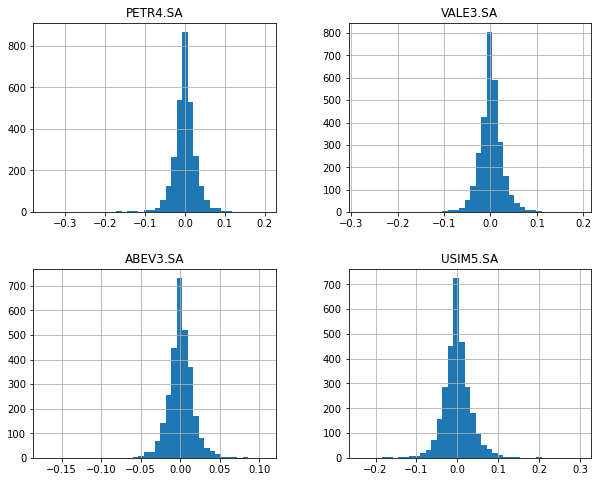

In [12]:
rets[papeis].hist(bins=40, figsize = (10, 8))

In [13]:
rets[papeis].mean() * 252

PETR4.SA   -0.003583
VALE3.SA    0.106825
ABEV3.SA    0.124268
USIM5.SA   -0.015721
dtype: float64

Matriz de covariância para pesos iguais
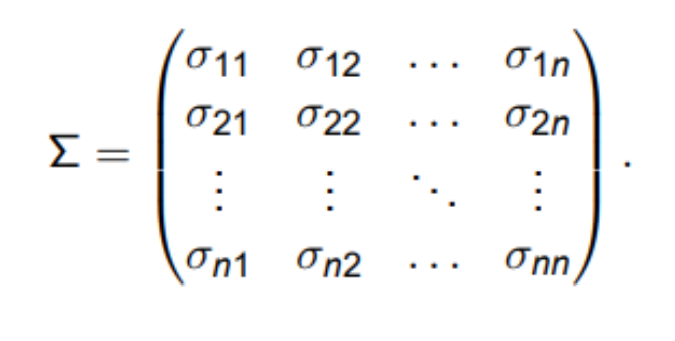

In [14]:
matriz_cov = rets[papeis].cov() * 252
matriz_cov

,PETR4.SA,VALE3.SA,ABEV3.SA,USIM5.SA
PETR4.SA,0.218260,0.092011,0.041273,0.115813
VALE3.SA,0.092011,0.171473,0.029511,0.112453
ABEV3.SA,0.041273,0.029511,0.067579,0.037254
USIM5.SA,0.115813,0.112453,0.037254,0.307019


Usando randon pra gerar pesos aleatórios

In [15]:
pesos = np.random.random(num_papeis)

print(pesos)
pesos.sum()

[0.35743906 0.89087733 0.64038579 0.76570306]


2.654405244469621

Dividindo os pesos pela soma dos pesos para gerar %

In [16]:
pesos = pesos / pesos.sum()
print(pesos)
pesos.sum()

[0.13465881 0.3356222  0.24125397 0.28846502]


1.0

In [17]:
dd = pd.DataFrame({'Retornos':rets[papeis].mean(), 'Pesos':pesos})
dd['Ret. proporcional'] = (dd['Retornos'] * dd['Pesos']) * 252
dd

,Retornos,Pesos,Ret. proporcional
PETR4.SA,-0.000014,0.134659,-0.000483
VALE3.SA,0.000424,0.335622,0.035853
ABEV3.SA,0.000493,0.241254,0.029980
USIM5.SA,-0.000062,0.288465,-0.004535


Retorno anualizado do portifólio dado os pesos

Somatório das médias dos retornos multiplicado pelo pesos

In [18]:
retorno_anualizado = np.sum(rets[papeis].mean() * pesos) * 252
retorno_anualizado

0.060815567843215235

Variância esperada do portifólio
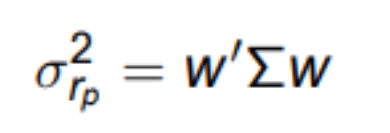

Multiplicando o transposto dos pesos pela multiplicação da matriz de covariâcia pelos pesos

w' = pesos.T

E = matriz_cov

w = pesos

In [19]:
var1 = np.dot(matriz_cov, pesos)
var1

array([0.10363701, 0.10949859, 0.04251254, 0.15088889])

In [20]:
var = np.dot(pesos.T, var1)
var

0.1044882783598805

In [21]:
variancia = np.dot(pesos.T, np.dot(matriz_cov, pesos))
variancia

0.1044882783598805

Volatilidade anualizada do portifólio dado os pesos

Desvio padrão = raiz da variância

In [22]:
desv_pad = variancia**(0.5)
desv_pad

0.32324646689465997

## Transformando em funções

Função do retorno anualizado

In [23]:
def retorno_port(rets, pesos):
    
    retorno_anualizado = np.sum(rets.mean() * pesos) * 252 
    
    return retorno_anualizado

Função da volatilidade anualizada

In [24]:
def volatilidade_port(matriz_cov, pesos):
    
    variancia = np.dot(pesos.T, np.dot(matriz_cov, pesos))
    desv_pad = variancia**(0.5)
    
    return desv_pad

## Método de Monte Carlo

Grande quantidade de números gerado aleatoriamente

In [25]:
# Escolha dos papeis
papeis = [
    'PETR4.SA',
    'GOLL4.SA',
    'VIVT3.SA',
    'BRKM5.SA'
]

df = fechamento[papeis]

# Registra o número de papeis para calcular os pesos
num_papeis = len(df.columns)

# Cálculo dos log retornos
rets = np.log(df/df.shift(1)).dropna()

# Cálculo da matriz de covariância
matriz_cov = rets.cov() * 252

# Iniciando as listas para receberem as variáveis do loop
retornos_simulado = []
volatilidade_simulado = []
todos_pesos = []

# Simulação de Monte Carlo
for p in range(2500):
    
    # Cálculo dos pesos aleatórios
    pesos = np.random.random(num_papeis)
    pesos = pesos / pesos.sum()
    
    # Adicionando os cálculos de retorno e vol para dado peso à lista iniciada previamente
    retornos_simulado.append(retorno_port(rets, pesos))
    
    volatilidade_simulado.append(volatilidade_port(matriz_cov, pesos))
    
    todos_pesos.append(pesos)
    
# Transformando retorno e vol em arrays
retornos_simulado = np.array(retornos_simulado)
volatilidade_simulado = np.array(volatilidade_simulado)

# Gerar Gráfico

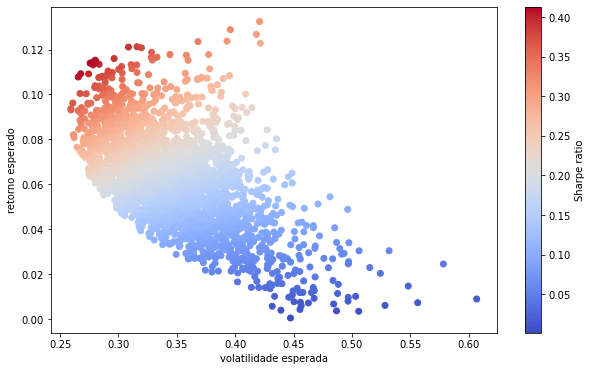

In [26]:
import matplotlib.pyplot as plt

# Tamanho da figura
plt.figure(figsize=(10, 6))

# Construindo o gráfico
plt.scatter(
    volatilidade_simulado, 
    retornos_simulado, 
    c = retornos_simulado / volatilidade_simulado,
    marker='o', 
    cmap='coolwarm'
    )

# Nomes dos eixos
plt.xlabel('volatilidade esperada')
plt.ylabel('retorno esperado')
plt.colorbar(label='Sharpe ratio')

DataFrame com os dados calculados

In [27]:
resultado = pd.DataFrame(
    {
        'Retornos': retornos_simulado,
        'Vol': volatilidade_simulado,
        'Sharpe': (retornos_simulado/volatilidade_simulado),
        'Combinação': todos_pesos,
    })

Ordenar o DataFrame do menor para maior Sharpe Ratio

In [28]:
resultado.sort_values(by='Sharpe', inplace=True)

resultado.round(4)

,Retornos,Vol,Sharpe,Combinação
2022,0.0006,0.4474,0.0013,"[0.8809686269044779, 0.09577574279530911, 0.00..."
947,0.0036,0.5059,0.0070,"[0.3923762608487309, 0.5898668634192545, 0.005..."
2470,0.0037,0.4869,0.0077,"[0.4353001164178404, 0.535854355549925, 0.0255..."
1742,0.0040,0.4392,0.0092,"[0.7069712195410696, 0.25328367649448674, 0.00..."
612,0.0044,0.4555,0.0096,"[0.5736229997592039, 0.39166597060735037, 0.00..."
...,...,...,...,...
1508,0.1092,0.2677,0.4081,"[0.020030523328290147, 0.023084623618240745, 0..."
1099,0.1145,0.2784,0.4113,"[0.02614882822051103, 0.006172372801085844, 0...."
1421,0.1153,0.2802,0.4114,"[0.029225139073352, 0.0009476395365306214, 0.5..."
9,0.1140,0.2772,0.4114,"[0.015056025320116464, 0.01757555106133118, 0...."


# Destacar o maior Sharpe Ratio

Usando idxmax para identificar linhas do maior Sharpe

In [29]:
vol_melhor, ret_melhor = resultado.loc[resultado['Sharpe'].idxmax()][['Vol', 'Retornos']]
print(vol_melhor)
print(ret_melhor)

0.2756571378812135
0.11393061349993008


Gráfico com maior Sharpe Ratio destacado

In [30]:
def grafico(papeis, resultado, min_vol=False):
        
    if min_vol is True:
        vol_melhor, ret_melhor, combinacao = resultado.loc[resultado['Vol'].idxmin()][['Vol', 'Retornos', 'Combinação']]
        titulo = 'Gráfico de mínima volatilidade'
    else:
        titulo = 'Gráfico de maior Sharpe Ratio'
        vol_melhor, ret_melhor, combinacao = resultado.loc[resultado['Sharpe'].idxmax()][['Vol', 'Retornos', 'Combinação']]
        
    proporcoes = pd.DataFrame(
        {
        'Participação':combinacao*100,
        'Papel':papeis
        })

    proporcoes = proporcoes.round(2).sort_values(by='Participação')
        
    print(f'O retorno médio esperado é de: {(ret_melhor*100).round(2)}% e a volatilidade de: {(vol_melhor*100).round(2)}%\n')
    print(proporcoes.to_string(index=False))
    
    # Dados para o gráfico
    vols = resultado['Vol']
    retornos = resultado['Retornos']
    sharpe = retornos / vols

    # Tamanho da figura
    plt.figure(figsize=(10, 6))

    # Construindo o gráfico
    plt.scatter(
        vols, 
        retornos, 
        c = sharpe,
        marker='o', 
        cmap='coolwarm'
        )

    # Adiciona o melhor sharpe ratio
    plt.plot(vol_melhor, 
             ret_melhor,
             'o', 
             color='green', 
             markersize=10.0)

    # Nomes dos eixos
    plt.title(titulo)
    plt.xlabel('volatilidade esperada')
    plt.ylabel('retorno esperado')
    plt.colorbar(label='Sharpe ratio')
    
    plt.show()

O retorno médio esperado é de: 9.37% e a volatilidade de: 25.92%

 Participação    Papel
         4.44 GOLL4.SA
         7.40 PETR4.SA
        18.20 BRKM5.SA
        69.95 VIVT3.SA


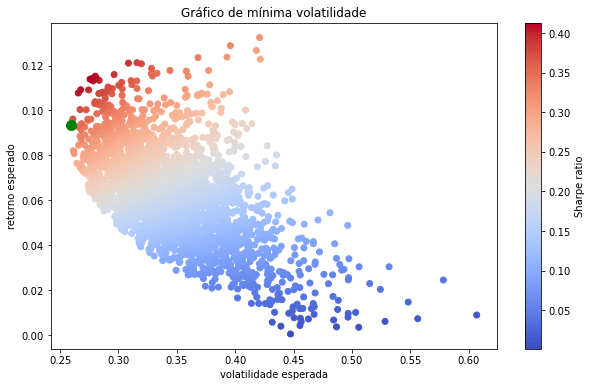

O retorno médio esperado é de: 11.39% e a volatilidade de: 27.57%

 Participação    Papel
         0.40 PETR4.SA
         2.39 GOLL4.SA
        39.69 BRKM5.SA
        57.52 VIVT3.SA


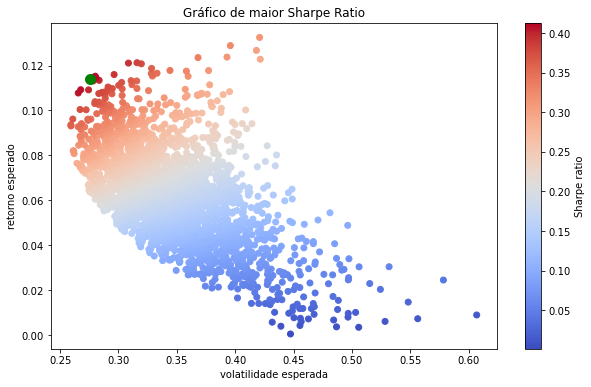

In [31]:
grafico(papeis, resultado, min_vol=True)
grafico(papeis, resultado, min_vol=False)

In [32]:
def MonteCarlo(papeis, n_simulacoes, fechamento):

    df = fechamento[papeis]

    # Registra o número de papeis para calcular os pesos
    num_papeis = len(df.columns)

    # Cálculo dos log retornos
    rets = np.log(df/df.shift(1)).dropna()

    # Cálculo da matriz de covariância
    matriz_cov = rets.cov() * 252

    # Iniciando as listas para receberem as variáveis do loop
    retornos_simulado = []
    volatilidade_simulado = []
    todos_pesos = []

    # Simulação de Monte Carlo
    for p in range(n_simulacoes):

        # Cálculo dos pesos aleatórios
        pesos = np.random.random(num_papeis)
        pesos = pesos / pesos.sum()

        # Adicionando os cálculos de retorno e vol para dado peso à lista iniciada previamente
        retornos_simulado.append(retorno_port(rets, pesos))

        volatilidade_simulado.append(volatilidade_port(matriz_cov, pesos))

        todos_pesos.append(pesos)

    # Transformando retorno e vol em arrays
    retornos_simulado = np.array(retornos_simulado)
    volatilidade_simulado = np.array(volatilidade_simulado)
    
    resultado = pd.DataFrame(
        {
        'Retornos': retornos_simulado,
        'Vol': volatilidade_simulado,
        'Sharpe': (retornos_simulado/volatilidade_simulado),
        'Combinação': todos_pesos,
        })
    
    resultado.sort_values(by='Sharpe', inplace=True)
    
    return retornos_simulado, volatilidade_simulado, resultado

O retorno médio esperado é de: 8.97% e a volatilidade de: 23.06%

 Participação    Papel
        16.83 EMBR3.SA
        22.66 BRFS3.SA
        60.50 ABEV3.SA


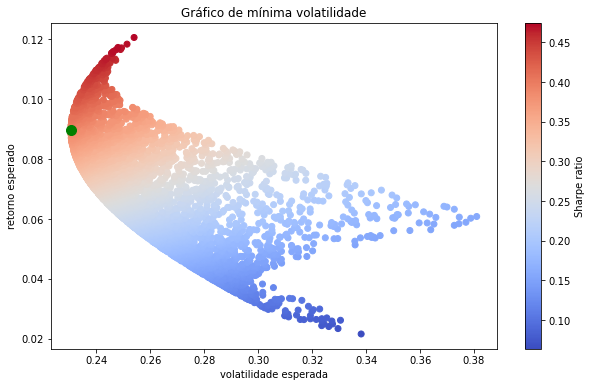

In [33]:
papers = ['ABEV3.SA', 'BRFS3.SA', 'EMBR3.SA']

ret_simulado, vol_simulado, result = MonteCarlo(papeis=papers, n_simulacoes=5000, fechamento=fechamento)

grafico(papeis=papers,
        resultado=result,
        min_vol=True)

Proporção ideal de cada papel